In [1]:
import os
import matplotlib.pyplot as plt
from read_write_mrc import read_mrc, write_mrc
from matplotlib.pyplot import imread
import numpy as np
import cv2

In [2]:
def padding(img):
    
    if (img.shape[1]%2 != 0):
        pad_img = np.pad(img, pad_width= (  (int((704-img.shape[0])/2),int((704-img.shape[0])/2+1))   ,  ( int((704-img.shape[1])/2), int((704-img.shape[1])/2+1)),  ( int((704-img.shape[2])/2), int((704-img.shape[2])/2+1)  ))) 
    
    if (img.shape[1]%2 ==0):
        pad_img = np.pad(img, pad_width= (  (int((704-img.shape[0])/2),int((704-img.shape[0])/2+1))   ,  ( int((704-img.shape[1])/2), int((704-img.shape[1])/2)),  ( int((704-img.shape[2])/2), int((704-img.shape[2])/2+1)  )))
    
    return pad_img

In [3]:
img = read_mrc("demo_data/mrc/KLW_PBC_INS1e_Ex-4_5min_1129_4_pre_rec.mrc")
labels = read_mrc("demo_data/masks/KLW_PBC_INS1e_Ex-4_5min_1129_4_pre_rec_labels.mrc")
print("before padding:")
print("img.shape : ", img.shape)
print("labels.shape : ",labels.shape)

img = padding(img)
labels = padding(labels)
print("\nafter padding")
print("img.shape : ",img.shape)
print("labels.shape : ",labels.shape)

before padding:
img.shape :  (479, 489, 479)
labels.shape :  (479, 489, 479)

after padding
img.shape :  (704, 704, 704)
labels.shape :  (704, 704, 704)


In [4]:
def mask_crop(image, labels):
    mask = np.where(labels != 0, np.full(labels.shape, 255), np.zeros(shape = labels.shape))
    masked = np.where(mask == 255, img, np.zeros(shape = img.shape))
    return (masked,labels)

    
    

In [5]:
image, mask = mask_crop(img,labels)

All entries are zero in either image or mask 170
Image nonzeros :  153057
labels nonzeros :  0 

All entries are zero in either image or mask 184
Image nonzeros :  166749
labels nonzeros :  0 

All entries are zero in either image or mask 37
Image nonzeros :  0
labels nonzeros :  0 

All entries are zero in either image or mask 178
Image nonzeros :  160881
labels nonzeros :  0 

All entries are zero in either image or mask 202
Image nonzeros :  182397
labels nonzeros :  0 

All entries are zero in either image or mask 218
Image nonzeros :  194133
labels nonzeros :  0 

All entries are zero in either image or mask 164
Image nonzeros :  145233
labels nonzeros :  0 

All entries are zero in either image or mask 213
Image nonzeros :  191199
labels nonzeros :  0 

All entries are zero in either image or mask 58
Image nonzeros :  0
labels nonzeros :  0 

All entries are zero in either image or mask 139
Image nonzeros :  108069
labels nonzeros :  0 

All entries are zero in either image or ma

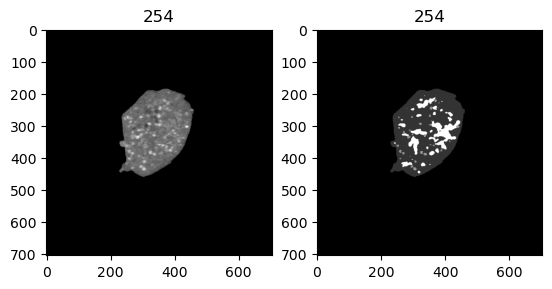

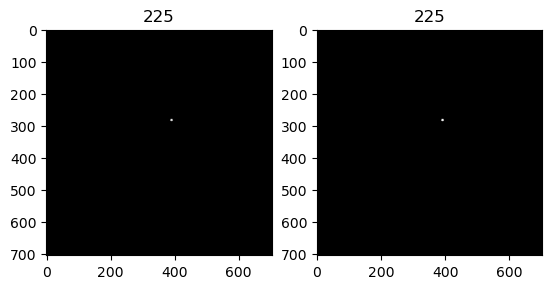

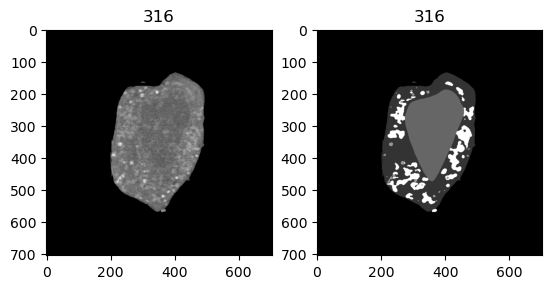

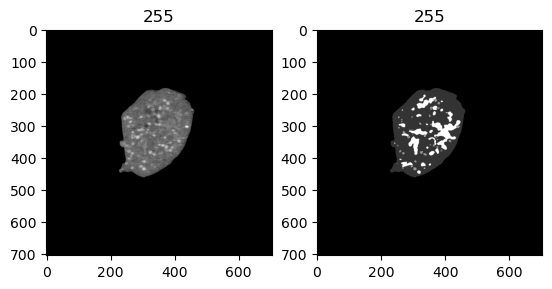

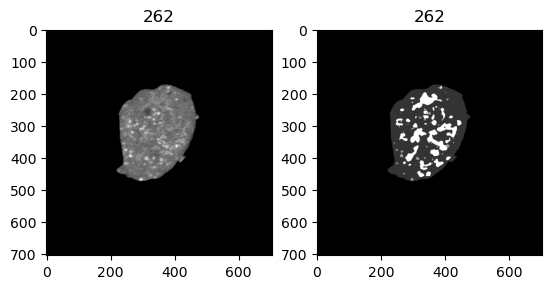

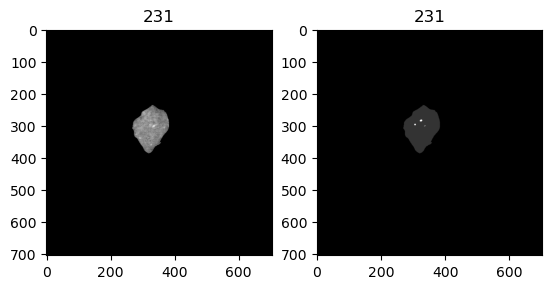

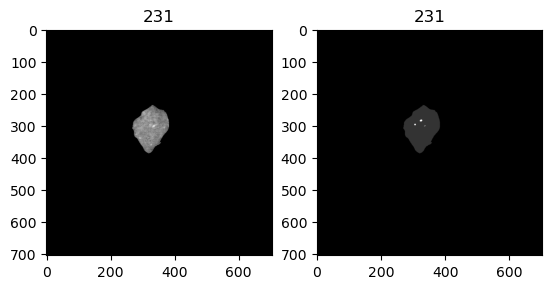

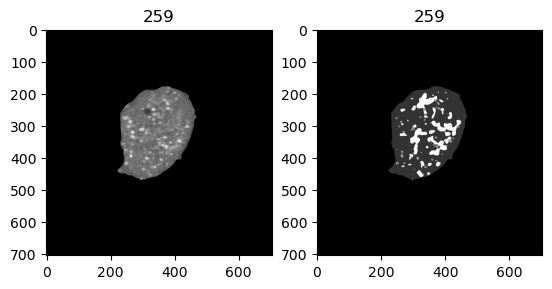

In [6]:
for i in np.random.randint(0,350,20):
    

    
    if( ( np.count_nonzero(img[i])==0 )  or  ( np.count_nonzero(mask[i]) == 0)  ):
        print("All entries are zero in either image or mask", i)
        print("Image nonzeros : ", np.count_nonzero(img[i]))
        print("labels nonzeros : ", np.count_nonzero(labels[i]),"\n")
        continue
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image[i],cmap = 'gray')
    plt.title(label = i)
    plt.subplot(1,2,2)
    plt.imshow(mask[i], cmap = 'gray')
    plt.title(label = i)
    
  

Text(0.5, 1.0, '195')

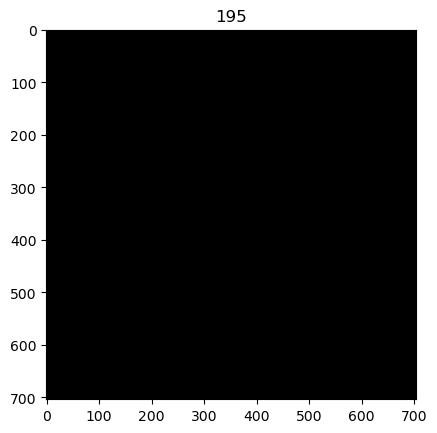

In [17]:
i=195
plt.figure()
plt.imshow(image[i], cmap = 'gray')
plt.title(label = i)

In [67]:
Y = np.where((labels == 5), np.ones(labels.shape), np.zeros(labels.shape))

In [45]:
np.unique(labels)

array([0., 1., 2., 3., 5.], dtype=float32)

In [46]:
np.unique(Y)

array([0., 1.])

In [68]:
Y.shape

(704, 704, 704)

In [78]:
labels.shape

(704, 704, 704)

In [99]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_mask, num_classes = 2)

In [100]:
y_mask.shape

(704, 704, 704, 1)

In [37]:
np.unique(labels)

array([0., 1., 2., 3., 5.], dtype=float32)

In [40]:
Y_train = to_categorical(labels, num_classes = 6)

In [42]:
Y_train.shape

(704, 704, 704, 6)

In [51]:
# for i in np.random.randint(0,350,20):
    

    
#     if( ( np.count_nonzero(img[i])==0 )  or  ( np.count_nonzero(Y[i]) == 0)  ):
#         print("All entries are zero in either image or mask", i)
#         print("Image nonzeros : ", np.count_nonzero(img[i]))
#         print("labels nonzeros : ", np.count_nonzero(Y[i]),"\n")
#         continue
    
#     plt.figure()
#     plt.subplot(1,2,1)
#     plt.imshow(image[i],cmap = 'gray')
#     plt.title(label = i)
#     plt.subplot(1,2,2)
#     plt.imshow(Y[i], cmap = 'gray')
#     plt.title(label = i)
    
  

In [52]:
Y_train.shape

(704, 704, 704, 2)

In [53]:
img.shape

(704, 704, 704)

In [101]:
train_img = np.stack((img,)*1, axis = -1)

# np.unique(train_img)

In [102]:
train_img.shape

(704, 704, 704, 1)

In [66]:
np.min(train_img)

-0.001723608

In [123]:





temp =np.zeros( shape= (64,64,64,64))

In [124]:
temp.shape

(64, 64, 64, 64)

In [125]:
train_img = np.stack((temp,)*1, axis = -1)



In [126]:
train_img.shape

(64, 64, 64, 64, 1)

In [127]:
temp = np.random.randint(0,2,(64,64,64,64))

train_mask = np.expand_dims(temp, axis = 4)

In [128]:
train_mask.shape

(64, 64, 64, 64, 1)

In [129]:
train_mask_cat = to_categorical(train_mask , num_classes = 2)

In [130]:
train_mask_cat.shape

(64, 64, 64, 64, 2)